In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import axes3d

In [2]:
# define the intersections of two lines
def line_intersection(line1, line2):
    xdiff = (line1[0][0] - line1[1][0], line2[0][0] - line2[1][0])
    ydiff = (line1[0][1] - line1[1][1], line2[0][1] - line2[1][1])

    def det(a, b):
        return a[0] * b[1] - a[1] * b[0]

    div = det(xdiff, ydiff)
    if div == 0:
        raise Exception('lines do not intersect')

    d = (det(*line1), det(*line2))
    x = det(d, xdiff) / div
    y = det(d, ydiff) / div
    return x, y

In [3]:
# discretization of triangle
# generate the grid and mash in 2D plane
tolerance = 0.01

lambda1 = np.array([1./3., 1./3.])
lambda5 = np.array([0.5 - 0.5*tolerance, 0.5 - 0.5*tolerance])
lambda15 = [1.0 - 2*tolerance, tolerance]

lambda2 = lambda1 + 0.25 * (lambda5 - lambda1)
lambda3 = lambda1 + 0.50 * (lambda5 - lambda1)
lambda4 = lambda1 + 0.75 * (lambda5 - lambda1)
lambda6 = lambda1 + 0.25 * (lambda15 - lambda1)
lambda9 = lambda5 + 0.25 * (lambda15 - lambda5)
lambda10 = lambda1 + 0.50 * (lambda15 - lambda1)
lambda12 = lambda5 + 0.50 * (lambda15 - lambda5)
lambda13 = lambda1 + 0.75 * (lambda15 - lambda1)
lambda14 = lambda5 + 0.75 * (lambda15 - lambda5)

lambda7 = np.array(line_intersection((lambda2,lambda14),(lambda3,lambda10)))
lambda8 = np.array(line_intersection((lambda4,lambda13),(lambda3,lambda12)))
lambda11 = np.array(line_intersection((lambda2,lambda14),(lambda4,lambda13)))

In [4]:
x = [lambda13[0], lambda14[0], lambda15[0]]
y = [lambda13[1], lambda14[1], lambda15[1]]
z = [0, 1]

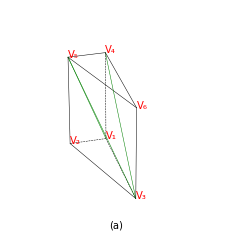

In [5]:
fig = plt.figure()
ax = plt.axes(projection='3d')

# generate lines for prism
ax.plot([lambda13[0], lambda14[0]], [lambda13[1], lambda14[1]], 1, color = 'k', linewidth = 0.5, linestyle = 'solid')
ax.plot([lambda14[0], lambda15[0]], [lambda14[1], lambda15[1]], 1, color = 'k', linewidth = 0.5, linestyle = 'solid')
ax.plot([lambda13[0], lambda15[0]], [lambda13[1], lambda15[1]], 1, color = 'k', linewidth = 0.5, linestyle = 'solid')

ax.plot([lambda13[0], lambda14[0]], [lambda13[1], lambda14[1]], 0, color = 'k', linewidth = 0.5, linestyle = 'dashed')
ax.plot([lambda14[0], lambda15[0]], [lambda14[1], lambda15[1]], 0, color = 'k', linewidth = 0.5, linestyle = 'dashed')
ax.plot([lambda13[0], lambda15[0]], [lambda13[1], lambda15[1]], 0, color = 'k', linewidth = 0.5, linestyle = 'solid')

# divide prism into three etrahedrals
ax.plot([x[0], x[2]], [y[0], y[2]], [z[1], z[0]], color = 'g', linewidth = 0.5, linestyle = 'solid')
ax.plot([x[1], x[2]], [y[1], y[2]], [z[1], z[0]], color = 'g', linewidth = 0.5, linestyle = 'solid')
ax.plot([x[0], x[1]], [y[0], y[1]], [z[1], z[0]], color = 'g', linewidth = 0.5, linestyle = 'solid')

subscript = str.maketrans("0123456789", "₀₁₂₃₄₅₆₇₈₉")
ax.text(lambda14[0], lambda14[1], 0, "V1".translate(subscript), color='red',size=10)
ax.text(lambda13[0], lambda13[1], 0, "V2".translate(subscript), color='red',size=10)
ax.text(lambda15[0], lambda15[1], 0, "V3".translate(subscript), color='red',size=10)
ax.text(lambda14[0], lambda14[1], 1, "V4".translate(subscript), color='red',size=10)
ax.text(lambda13[0], lambda13[1], 1, "V5".translate(subscript), color='red',size=10)
ax.text(lambda15[0], lambda15[1], 1, "V6".translate(subscript), color='red',size=10)

# projected line between 2D and 3D points
ax.plot([lambda13[0],lambda13[0]],
        [lambda13[1],lambda13[1]],
        [1,0], 
        color='k',linewidth = 0.5, linestyle = 'solid')
    
ax.plot([lambda14[0],lambda14[0]],
        [lambda14[1],lambda14[1]],
        [1,0], 
        color='k',linewidth = 0.5, linestyle = 'dashed')

ax.plot([lambda15[0],lambda15[0]],
        [lambda15[1],lambda15[1]],
        [1,0], 
        color='k',linewidth = 0.5, linestyle = 'solid')

ax.set_xlabel('λ1'.translate(subscript), fontsize=12)
ax.set_ylabel('λ2'.translate(subscript), fontsize=12)
ax.set_zlabel(''' z' ''', fontsize=12)
ax.set_xlim3d(0.8,1)
ax.set_ylim3d(0,0.2)
ax.set_zlim3d(0,1)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])
ax.set_title('(a)',fontsize=10,y=-0.05)

# turn off the grid and space
ax.grid(False)
ax.axis('off')

fig.savefig('StandardPrismDivide1.png', dpi=125, bbox_inches='tight')

In [6]:
x1 = [lambda2[0], lambda6[0], lambda7[0]]
y1 = [lambda2[1], lambda6[1], lambda7[1]]
random_pt = []

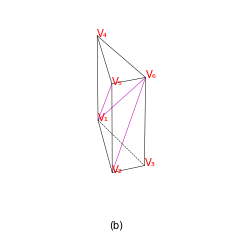

In [7]:
fig1 = plt.figure()
ax1 = plt.axes(projection='3d')

ax1.plot([lambda2[0], lambda6[0]], [lambda2[1], lambda6[1]], 1, color = 'k', linewidth = 0.5, linestyle = 'solid')
ax1.plot([lambda2[0], lambda7[0]], [lambda2[1], lambda7[1]], 1, color = 'k', linewidth = 0.5, linestyle = 'solid')
ax1.plot([lambda6[0], lambda7[0]], [lambda6[1], lambda7[1]], 1, color = 'k', linewidth = 0.5, linestyle = 'solid')

ax1.plot([lambda2[0], lambda6[0]], [lambda2[1], lambda6[1]], 0, color = 'k', linewidth = 0.5, linestyle = 'solid')
ax1.plot([lambda2[0], lambda7[0]], [lambda2[1], lambda7[1]], 0, color = 'k', linewidth = 0.5, linestyle = 'dashed')
ax1.plot([lambda6[0], lambda7[0]], [lambda6[1], lambda7[1]], 0, color = 'k', linewidth = 0.5, linestyle = 'solid')

# divide prism into three etrahedrals
ax1.plot([x1[0], x1[1]], [y1[0], y1[1]], [z[0], z[1]], color = 'm', linewidth = 0.5, linestyle = 'solid')
ax1.plot([x1[0], x1[2]], [y1[0], y1[2]], [z[0], z[1]], color = 'm', linewidth = 0.5, linestyle = 'solid')
ax1.plot([x1[2], x1[1]], [y1[2], y1[1]], [z[1], z[0]], color = 'm', linewidth = 0.5, linestyle = 'solid')

ax1.text(lambda2[0],lambda2[1], 0, "V1".translate(subscript), color='red',size=10)
ax1.text(lambda6[0],lambda6[1], 0, "V2".translate(subscript), color='red',size=10)
ax1.text(lambda7[0],lambda7[1], 0, "V3".translate(subscript), color='red',size=10)
ax1.text(lambda2[0],lambda2[1], 1, "V4".translate(subscript), color='red',size=10)
ax1.text(lambda6[0],lambda6[1], 1, "V5".translate(subscript), color='red',size=10)
ax1.text(lambda7[0],lambda7[1], 1, "V6".translate(subscript), color='red',size=10)

# projected line between 2D and 3D points
ax1.plot([lambda2[0],lambda2[0]],
        [lambda2[1],lambda2[1]],
        [1,0], 
        color='k',linewidth = 0.5, linestyle = 'solid')
    
ax1.plot([lambda6[0],lambda6[0]],
        [lambda6[1],lambda6[1]],
        [1,0], 
        color='k',linewidth = 0.5, linestyle = 'solid')

ax1.plot([lambda7[0],lambda7[0]],
        [lambda7[1],lambda7[1]],
        [1,0], 
        color='k',linewidth = 0.5, linestyle = 'solid')

ax1.set_xlabel('λ1'.translate(subscript), fontsize=12)
ax1.set_ylabel('λ2'.translate(subscript), fontsize=12)
ax1.set_zlabel(''' z' ''', fontsize=12)
ax1.set_xlim3d(0.35,0.6)
ax1.set_ylim3d(0.2,0.4)
ax1.set_zlim3d(0,1)
ax1.set_xticklabels([])
ax1.set_yticklabels([])
ax1.set_zticklabels([])
ax1.set_title('(b)',fontsize=10,y=-0.05)

# turn off the grid and space
ax1.grid(False)
ax1.axis('off')

fig1.savefig('StandardPrismDivide2.png', dpi=125, bbox_inches='tight')

In [8]:
import numpy as np
import PIL
from PIL import Image

list_im = ['StandardPrismDivide1.png', 'StandardPrismDivide2.png']
imgs    = [ PIL.Image.open(i) for i in list_im ]
# pick the image which is the smallest, and resize the others to match it (can be arbitrary image shape here)
min_shape = sorted([(np.sum(i.size),i.size) for i in imgs])[0][1]
imgs_comb = np.hstack((np.asarray(i.resize(min_shape)) for i in imgs))

# save that beautiful picture
imgs_comb = PIL.Image.fromarray(imgs_comb)
imgs_comb.save('DividePrisms2in1.png')    

<ipython-input-8-a2ba76c40b5e>:9: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  imgs_comb = np.hstack((np.asarray(i.resize(min_shape)) for i in imgs))
